# eXamine Project
### Due Monday 3/16

TODO:

1. Upload images and convert to ___ format 

2. Convert images to 64x64 size, split into train/test
    1. PIL_Image_Resize ipnyb: https://drive.google.com/file/d/1dil0Jf0NGskYy0zGeTc4r3JG-gRPFf4f/view?usp=sharing
    2. Build and Train ipnyb: https://colab.research.google.com/drive/1pBFuFc59BmADPkVEIsfAsmK0Wqrtc5O-

3. Modify neural network output layer to have 3 outputs
    1. helper py: https://drive.google.com/file/d/1s5OeYriRX8pofYnPiWCqf_70LpCCZRyZ/view?usp=sharing

4. Train neural network on ultrasound images
    1. FinalTraining py: https://drive.google.com/file/d/1aO9DXVfV1a_6De0mXUFPHbaE34qbXWIY/view?usp=sharing


5. Evaluate model (final_test.py)


Useful Links:
- MeDecal Slides on Neural Networks and CNNs: https://docs.google.com/presentation/d/1tAoXl_42dEfBdw-j_cuv_mXgFPm_IynoqIY5Zx9fYZQ/edit?usp=sharing (Lecture #4 for basic Neural Nets, Lecture #5 and/or 6 for CNNs)

In [0]:
from PIL import Image 
from scipy import misc
from matplotlib import pyplot as plt
import numpy as np
import os

import csv
import random

import tensorflow as tf
from tensorflow import keras
from keras import backend as K
from keras.models import load_model
from keras import optimizers

import helper
import helper2

Pyprind import failed, getting now!
0


ModuleNotFoundError: ModuleNotFoundError: No module named 'pyprind'

In [0]:
from keras.models import Sequential, Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, ZeroPadding2D
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

# Resize and store images

In [0]:
# #  RUN THIS ONCE!

# for i in range(500):
#     exists = os.path.isfile("benign/benign ({}).png".format(i)) # check if file exists
#     if exists:
#         image = Image.open("benign/benign ({}).png".format(i)).convert('L')
#         image = image.resize((64, 64), Image.ANTIALIAS)
#         image.save('Test_Resized_Benign/Test_output{}.png'.format(i), 'PNG')

In [0]:
# # we may need to use this code later to resize the other images

# RESIZE = 64
# size = RESIZE, RESIZE

# total_files = []

# for i in FOLDERS_TO_READ:
#     #print("Grabbing info for folder {}".format(i))
#     total_files = total_files + ["images{}/{}".format(i,j) for j in os.listdir("images{}".format(i))]
# print(len(total_files))

# total_files2 = []
# for i in total_files:
#     if ".bmp" in i:
#         total_files2.append(i)

# total_files = total_files2

# print(len(total_files))

# Construct CNN

In [0]:
#and create model and move weights
loss = 'mse'
optimizer = 'sgd'
lr = .1
image_size = 64

## set keras to see all gpus 
import tensorflow as tf
from keras import backend as K
from keras.models import load_model
import numpy as np

from keras import optimizers
sgd = optimizers.SGD(lr=lr)
optimizer = sgd


modelold = load_model("Final_model.h5")

In [0]:
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import layers

In [0]:
tf.keras.preprocessing.image_dataset_from_directory(
    total_files2, labels='inferred', label_mode='int',
    class_names=None, color_mode='rgb', batch_size=32, image_size=(256,
    256), shuffle=True, seed=None, validation_split=None, subset=None,
    interpolation='bilinear', follow_links=False)

NameError: NameError: name 'total_files2' is not defined

In [0]:
total_files2.disable_progress_bar()

train_ds, validation_ds, test_ds = total_files2.load("total_files2",
    # Reserve 10% for validation and 10% for test
    split=["train[:40%]", "train[40%:50%]", "train[50%:60%]"],
    as_supervised=True,)

print("Number of training samples: %d" % tf.data.experimental.cardinality(train_ds))
print("Number of validation samples: %d" % tf.data.experimental.cardinality(validation_ds))
print("Number of test samples: %d" % tf.data.experimental.cardinality(test_ds))

NameError: NameError: name 'total_files2' is not defined

In [0]:
tfds.disable_progress_bar()

train_ds, validation_ds, test_ds = tfds.load("total_files2",
    # Reserve 10% for validation and 10% for test
    split=["train[:40%]", "train[40%:50%]", "train[50%:60%]"],
    as_supervised=True,)

print("Number of training samples: %d" % tf.data.experimental.cardinality(train_ds))
print("Number of validation samples: %d" % tf.data.experimental.cardinality(validation_ds))
print("Number of test samples: %d" % tf.data.experimental.cardinality(test_ds))

DatasetNotFoundError: DatasetNotFoundError: Dataset total_files2 not found.
Available datasets:
	- abstract_reasoning
	- accentdb
	- aeslc
	- aflw2k3d
	- ag_news_subset
	- ai2_arc
	- ai2_arc_with_ir
	- amazon_us_reviews
	- anli
	- arc
	- bair_robot_pushing_small
	- bccd
	- beans
	- big_patent
	- bigearthnet
	- billsum
	- binarized_mnist
	- binary_alpha_digits
	- blimp
	- bool_q
	- c4
	- caltech101
	- caltech_birds2010
	- caltech_birds2011
	- cars196
	- cassava
	- cats_vs_dogs
	- celeb_a
	- celeb_a_hq
	- cfq
	- cherry_blossoms
	- chexpert
	- cifar10
	- cifar100
	- cifar10_1
	- cifar10_corrupted
	- citrus_leaves
	- cityscapes
	- civil_comments
	- clevr
	- clic
	- clinc_oos
	- cmaterdb
	- cnn_dailymail
	- coco
	- coco_captions
	- coil100
	- colorectal_histology
	- colorectal_histology_large
	- common_voice
	- coqa
	- cos_e
	- cosmos_qa
	- covid19sum
	- crema_d
	- curated_breast_imaging_ddsm
	- cycle_gan
	- dart
	- davis
	- deep_weeds
	- definite_pronoun_resolution
	- dementiabank
	- diabetic_retinopathy_detection
	- div2k
	- dmlab
	- downsampled_imagenet
	- drop
	- dsprites
	- dtd
	- duke_ultrasound
	- e2e_cleaned
	- emnist
	- eraser_multi_rc
	- esnli
	- eurosat
	- fashion_mnist
	- flic
	- flores
	- food101
	- forest_fires
	- fuss
	- gap
	- geirhos_conflict_stimuli
	- genomics_ood
	- german_credit_numeric
	- gigaword
	- glue
	- goemotions
	- gpt3
	- groove
	- gtzan
	- gtzan_music_speech
	- hellaswag
	- higgs
	- horses_or_humans
	- howell
	- i_naturalist2017
	- imagenet2012
	- imagenet2012_corrupted
	- imagenet2012_real
	- imagenet2012_subset
	- imagenet_a
	- imagenet_r
	- imagenet_resized
	- imagenet_v2
	- imagenette
	- imagewang
	- imdb_reviews
	- irc_disentanglement
	- iris
	- kitti
	- kmnist
	- lambada
	- lfw
	- librispeech
	- librispeech_lm
	- libritts
	- ljspeech
	- lm1b
	- lost_and_found
	- lsun
	- lvis
	- malaria
	- math_dataset
	- mctaco
	- mlqa
	- mnist
	- mnist_corrupted
	- movie_lens
	- movie_rationales
	- movielens
	- moving_mnist
	- multi_news
	- multi_nli
	- multi_nli_mismatch
	- natural_questions
	- natural_questions_open
	- newsroom
	- nsynth
	- nyu_depth_v2
	- omniglot
	- open_images_challenge2019_detection
	- open_images_v4
	- openbookqa
	- opinion_abstracts
	- opinosis
	- opus
	- oxford_flowers102
	- oxford_iiit_pet
	- para_crawl
	- patch_camelyon
	- paws_wiki
	- paws_x_wiki
	- pet_finder
	- pg19
	- piqa
	- places365_small
	- plant_leaves
	- plant_village
	- plantae_k
	- qa4mre
	- qasc
	- quac
	- quickdraw_bitmap
	- race
	- radon
	- reddit
	- reddit_disentanglement
	- reddit_tifu
	- resisc45
	- robonet
	- rock_paper_scissors
	- rock_you
	- s3o4d
	- salient_span_wikipedia
	- samsum
	- savee
	- scan
	- scene_parse150
	- scicite
	- scientific_papers
	- sentiment140
	- shapes3d
	- siscore
	- smallnorb
	- snli
	- so2sat
	- speech_commands
	- spoken_digit
	- squad
	- stanford_dogs
	- stanford_online_products
	- starcraft_video
	- stl10
	- story_cloze
	- sun397
	- super_glue
	- svhn_cropped
	- ted_hrlr_translate
	- ted_multi_translate
	- tedlium
	- tf_flowers
	- the300w_lp
	- tiny_shakespeare
	- titanic
	- trec
	- trivia_qa
	- tydi_qa
	- uc_merced
	- ucf101
	- vctk
	- vgg_face2
	- visual_domain_decathlon
	- voc
	- voxceleb
	- voxforge
	- waymo_open_dataset
	- web_nlg
	- web_questions
	- wider_face
	- wiki40b
	- wiki_bio
	- wiki_table_questions
	- wiki_table_text
	- wikihow
	- wikipedia
	- wikipedia_toxicity_subtypes
	- wine_quality
	- winogrande
	- wmt14_translate
	- wmt15_translate
	- wmt16_translate
	- wmt17_translate
	- wmt18_translate
	- wmt19_translate
	- wmt_t2t_translate
	- wmt_translate
	- wordnet
	- wsc273
	- xnli
	- xquad
	- xsum
	- xtreme_pawsx
	- xtreme_xnli
	- yelp_polarity_reviews
	- yes_no

Check that:
    - if dataset was added recently, it may only be available
      in `tfds-nightly`
    - the dataset name is spelled correctly
    - dataset class defines all base class abstract methods
    - the module defining the dataset class is imported


In [0]:
#images already resized
batch_size = 32

train_ds = train_ds.cache().batch(batch_size).prefetch(buffer_size = 10)
validation_ds = validation_ds.cache().batch(batch_size).prefetch(buffer_size = 10)
test_ds = test_ds.cache().batch(batch_size).prefetch(buffer_size = 10)

NameError: NameError: name 'train_ds' is not defined

In [0]:
#random data augmentation 
#apply random realistic transformations to the training images

data_augmentation = keras.Sequential(
     [
      layers.experimental.preprocessing.RandomFlip("horizontal"),
      layers.experimental.preprocessing.RandomRotation(0.1),
      ]
                                     )

In [0]:
base_model = keras.applications.Xception(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(64, 64, 1),
    include_top=False)  # Do not include the ImageNet classifier at the top.

# Freeze the base_model
base_model.trainable = False

# Create new model on top
inputs = keras.Input(shape=(64, 64, 1))

# Apply random data augmentation
x = data_augmentation(inputs)  

norm_layer = keras.layers.experimental.preprocessing.Normalization()
mean = np.array([127.5] * 3)
var = mean ** 2
x = norm_layer(x)
norm_layer.set_weights([mean, var])

x = base_model(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)  # Regularize with dropout
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

model.summary()

ValueError: ValueError: The input must have 3 channels; got `input_shape=(64, 64, 1)`

In [0]:
#Create model and move weights
model = helper2.encapsulate(image_size, [1,1,1,2,2,4,4,8],64)()
model.summary()
# model.set_weights(modelold.get_weights())

NameError: NameError: name 'helper2' is not defined

In [0]:

#from keras.applications.inception_v3 import InceptionV3
# load model
#model = InceptionV3()
# summarize the model
#model.summary()

In [0]:
#and remove old model 
modelold = []
print("Weights loaded!")

Weights loaded!


Exception ignored in: ('self', 'download_dir', 'download_config', 'data_exists', 'available_to_prepare', 'installable_versions', 'msg', 'dl_manager', 'tmp_data_dir', 'tensorflow_data_validation', 'skip_stats_computation', 'splits', 'statistics_already_computed')
Traceback (most recent call last):
  File "/opt/datalore/python/datalore/core/workbook/lazy_environment.py", line 73, in __setitem__
    super().__setitem__(key, value)
TypeError: 'tuple' object is not callable


In [0]:
#generate early stopping
#stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto', baseline=.95, restore_best_weights=False)
model.compile(optimizer, loss, metrics=['accuracy'])

NameError: NameError: name 'model' is not defined

In [0]:
#Train model
model.summary()

NameError: NameError: name 'model' is not defined

In [0]:
x_train, y_train, z_train = helper.load(image_size, 'validate')

NameError: NameError: name 'helper' is not defined

# Pass in images to unmodified CNN to test

In [0]:
'''
Note: the dimensions when calling model.predict(list_of_images) where

x_test = array with shape (#images, 64, 64, 1)
z_test = array with shape (#images, 2)
list_of_images = (x_test, z_test)

so each element in x_test will be an array of size (64, 64, 1)
and each element in z_test will be an array of [a, b] where 0 <= a,b <= 1
'''

path = 'Test_Resized_Benign/Test_output1.png'
image = Image.open(path)
image_arr = np.asarray(image)
image_arr.resize((64, 64, 1))

path = 'Test_Resized_Benign/Test_output2.png'
image = Image.open(path)
image_arr2 = np.asarray(image)
image_arr2.resize((64, 64, 1))

print('this will be the size of 1 element in the x_test array when calling model.predict((x_test, z_test)): ', image_arr.shape)

this will be the size of 1 element in the x_test array when calling model.predict((x_test, z_test)):  (64, 64, 1)


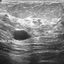

In [0]:
image

In [0]:
x_test = np.array([image_arr, image_arr2])
z_test = np.array([np.array([0.48, 1]), np.array([0.48, 1])])

output = model.predict([x_test, z_test])
output.shape

NameError: NameError: name 'model' is not defined

In [0]:
output

NameError: NameError: name 'output' is not defined

In [29]:
pip install opencv-python

You should consider upgrading via the '/opt/python/envs/default/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [30]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [31]:
def plot_learning(history,label,c,ax_loss,ax_acc):
  train_label = "train ({0})".format(label)
  val_label   = "validation ({0})".format(label)
  if 'loss' in history.history:
    ax_loss.plot(history.history['loss'],c=c,label=train_label)
  if 'val_loss' in history.history:
    ax_loss.plot(history.history['val_loss'],'--',c=c,label=val_label)
  if 'accuracy' in history.history:
    ax_acc.plot(history.history['accuracy'],c=c,label=train_label)
  if 'val_accuracy' in history.history:
    ax_acc.plot(history.history['val_accuracy'],'--',c=c,label=val_label)

  for ax in [ax_loss,ax_acc]:
    ax.legend()
    ax.grid('on')
    ax.set_xlabel("epoch")
  ax_loss.set_ylabel("Loss")
  ax_acc.set_ylabel("Accuracy")

In [32]:
import cv2
DATADIR = "Datasets"
CATEGORIES = ["benign", "malignant", "normal"]

for category in CATEGORIES:  
    path = os.path.join(DATADIR,category)  
    for img in os.listdir(path):  
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display

        break
    break 

ImportError: ImportError: libgthread-2.0.so.0: cannot open shared object file: No such file or directory

In [33]:
print(img_array.shape)

NameError: NameError: name 'img_array' is not defined

In [34]:

IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

NameError: NameError: name 'cv2' is not defined

In [0]:
os.path.join('hello','world')
CATEGORIES

NameError: NameError: name 'CATEGORIES' is not defined

In [0]:
# SLIDES

training_data = []

def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category)  # create path
        class_num = CATEGORIES.index(category)  # get the classification  (0, 1, 2)

        for img in os.listdir(path):  # iterate over each image
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # keeping the output clean...
                pass

In [0]:
training_data_nomask = []

def create_training_nomask():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category)  # create path
        class_num = CATEGORIES.index(category)  # get the classification  (0, 1, 2)

        for img in os.listdir(path):  # iterate over each image
            try:
                if "mask" in os.path.join(path,img):
                    continue
                else:
                    img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                    training_data_nomask.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # keeping the output clean...
                pass

In [0]:
# create_training_nomask()

create_training_data()

print(len(training_data))

NameError: NameError: name 'CATEGORIES' is not defined

In [0]:
import random

# random.shuffle(training_data)
random.shuffle(training_data_nomask)

In [0]:
for sample in training_data_nomask[:10]:
    print(sample[1])

In [0]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
# print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

In [0]:
X_nomask = []
y_nomask = []

for features,label in training_data_nomask:
    X_nomask.append(features)
    y_nomask.append(label)

X_nomask = np.array(X_nomask).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [0]:
import pickle

pickle_out = open("X_nomask.pickle","wb")
pickle.dump(X_nomask, pickle_out)
pickle_out.close()

pickle_out = open("y_nomask.pickle","wb")
pickle.dump(y_nomask, pickle_out)
pickle_out.close()

pickle_in = open("X_nomask.pickle","rb")
X_nomask = pickle.load(pickle_in)

pickle_in = open("y_nomask.pickle","rb")
y_nomask = pickle.load(pickle_in)

In [0]:
# SLIDES

import pickle #save this data

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [0]:
from tensorflow import keras
from tensorflow.python.framework.ops import disable_eager_execution
from tensorflow.keras.backend import clear_session
import matplotlib.gridspec as gridspec
import pandas as pd
import numpy as np

In [0]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

# SLIDES

X_train_sample, y_train_sample = resample(X,y, replace=False,n_samples=1578, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_sample,y_train_sample,test_size=0.2,
                                                  stratify=y_train_sample)

ValueError: ValueError: Cannot sample 1578 out of arrays with dim 0 when replace is False

In [0]:
# # comment this out if you want to use the ones with masks
X_train_sample, y_train_sample = resample(X_nomask,y_nomask, replace=False,n_samples=780, stratify=y_nomask)
X_train, X_val, y_train, y_val = train_test_split(X_train_sample,y_train_sample,test_size=0.2,
                                                   stratify=y_train_sample)

ValueError: ValueError: Cannot sample 780 out of arrays with dim 0 when replace is False

In [0]:
y_train = np.array(y_train)
y_val = np.array(y_val)

NameError: NameError: name 'y_train' is not defined

In [0]:
# SLIDES

print("Shape of the training images array:", X_train.shape)
print("Shape of the training labels array:", y_train.shape)
print("Shape of the validation images array:",X_val.shape)
print("Shape of the validation labels array:",y_val.shape)

NameError: NameError: name 'X_train' is not defined

In [0]:
X_train = np.array(X_train) / 255
X_val   = np.array(X_val) / 255

NameError: NameError: name 'X_train' is not defined

In [0]:
# SLIDES

fig = plt.figure(constrained_layout=True,figsize=(15,4.5))
spec_arr = gridspec.GridSpec(ncols=10, nrows=3, figure=fig)
for ximg, ylabel, spec in zip(X_train,y_train,spec_arr):
  ax = fig.add_subplot(spec)
  ax.imshow(ximg)
  ax.set_title("({0})".format(ylabel))
  ax.set_xticks([])
  ax.set_yticks([])

NameError: NameError: name 'X_train' is not defined

<Figure size 1500x450 with 0 Axes>

In [0]:
# SLIDES

clear_session()
initializer_G = keras.initializers.GlorotNormal(seed=0)

model_basic = keras.Sequential([
    keras.layers.Flatten(input_shape=[100,100]),
    keras.layers.Dense(units=100,activation="sigmoid",kernel_initializer=initializer_G),
    keras.layers.Dense(units=3,activation="softmax",kernel_initializer=initializer_G)])

# model_basic.compile(loss="sparse_categorical_crossentropy",
#               optimizer=keras.optimizers.SGD(learning_rate=1),
#               metrics=["accuracy"])

model_basic.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=0.005),
              metrics=["accuracy"])

print(model_basic.summary())

history = model_basic.fit(X_train,y_train,validation_data=(X_val,y_val),batch_size=10,epochs=50,shuffle=False,verbose=1)
lr_num = keras.backend.eval(history.model.optimizer.learning_rate)
fig, AX = plt.subplots(nrows=1,ncols=2,figsize=(9,4))
# plot_learning(history_basic,'lr=1.0','C0',AX[0],AX[1])
plot_learning(history,'lr={0}'.format(lr_num),'C1',AX[0],AX[1])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 10000)             0         
_________________________________________________________________
dense (Dense)                (None, 100)               1000100   
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 303       
Total params: 1,000,403
Trainable params: 1,000,403
Non-trainable params: 0
_________________________________________________________________
None


NameError: NameError: name 'X_train' is not defined

In [0]:
# def build_vanillaNN(optimizer):
#   model = keras.models.Sequential([
#     keras.layers.Flatten(input_shape=[28,28]),
#     keras.layers.Dense(100,activation="sigmoid",kernel_initializer=initializer_G),
#     keras.layers.Dense(3,activation="softmax",kernel_initializer=initializer_G)
#   ])
#   model.compile(loss="sparse_categorical_crossentropy",
#                 optimizer=optimizer,
#                 metrics=["accuracy"])
#   return model

# def train_nn(model,epochs=5,verbose=0,validation=True):
#   if validation:
#     history = model.fit(X_train,y_train,validation_data=(X_val,y_val),
#                         batch_size=32,epochs=epochs,shuffle=False,verbose=verbose)
#   else:
#     history = model.fit(X_train,y_train,
#                         batch_size=32,epochs=epochs,shuffle=False,verbose=verbose)
#   return history

In [1]:
import numpy as np
import os
import time
from keras.applications import ResNet50
from keras.preprocessing import image
from keras.layers import GlobalAveragePooling2D, Dense, Dropout,Activation,Flatten
from keras.applications.resnet import preprocess_input
from keras.layers import Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from PIL import Image

In [2]:
img_path = 'Datasets/benign/benign (1).png'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
print (x.shape)
x = np.expand_dims(x, axis=0)
print (x.shape)
x = preprocess_input(x)
print('Input image shape:', x.shape)

(224, 224, 3)
(1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)


In [3]:
# Loading the training data
DATADIR = "Datasets"
CATEGORIES = ["benign", "malignant", "normal"]

In [4]:
PATH = 'Datasets'
# Define data path

data_dir_list = os.listdir(PATH)
data_dir_list

['benign', 'malignant', 'normal']

In [5]:
img_data_list=[]

for dataset in data_dir_list:
	img_list=os.listdir(PATH+'/'+ dataset) 
	for img in img_list:
		img_path = PATH + '/'+ dataset + '/'+ img 
		img = image.load_img(img_path, target_size=(224, 224))
		#a = img.rotate(90)
		#b = img.rotate(180)
		#c = img.rotate(270)
		x = image.img_to_array(img)
		#a1 = image.img_to_array(a)
		#b1 = image.img_to_array(b)
		#c1 = image.img_to_array(c)
		x = np.expand_dims(x, axis=0)
		#a1 = np.expand_dims(a1, axis=0)
		#b1 = np.expand_dims(b1, axis=0)
		#c1 = np.expand_dims(c1, axis=0)
		x = preprocess_input(x)
		#a1 = preprocess_input(a1)
		#b1 = preprocess_input(b1)
		#c1 = preprocess_input(c1)
		#print('Input image shape:', x.shape)
		#print('Input image shape:', a1.shape)
		#print('Input image shape:', b1.shape)
		#print('Input image shape:', c1.shape)
		img_data_list.append(x)
		#img_data_list.append(a1)
		#img_data_list.append(b1)
		#img_data_list.append(c1)

img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
print (img_data.shape)
img_data=np.rollaxis(img_data,1,0)
print (img_data.shape)
img_data=img_data[0]
print (img_data.shape)
print(len(img_data_list))

(780, 1, 224, 224, 3)
(1, 780, 224, 224, 3)
(780, 224, 224, 3)
780


In [6]:
len(img_data)

780

In [7]:
# Define the number of classes
num_classes = 3
num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:260]=0
labels[260:520]=1
labels[520:]=2

In [8]:
names = ["benign", "malignant", "normal"]
# convert class labels to on-hot encoding
Y = np_utils.to_categorical(labels, num_classes)

In [9]:
#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=2)

In [10]:
image_input = Input(shape=(224, 224, 3))
model = ResNet50(weights='imagenet',include_top=False)
model.summary()
last_layer = model.output
# add a global spatial average pooling layer
x = GlobalAveragePooling2D()(last_layer)
# add fully-connected & dropout layers
x = Dense(512, activation='relu',name='fc-1')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu',name='fc-2')(x)
x = Dropout(0.5)(x)
# a softmax layer for 4 classes
out = Dense(num_classes, activation='softmax',name='output_layer')(x)

# this is the model we will train
custom_resnet_model2 = Model(inputs=model.input, outputs=out)

custom_resnet_model2.summary()

for layer in custom_resnet_model2.layers[:-6]:
	layer.trainable = False

custom_resnet_model2.layers[-1].trainable

custom_resnet_model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

t=time.time()
hist = custom_resnet_model2.fit(X_train, y_train, batch_size=32, epochs=3, verbose=1, validation_data=(X_val, y_val))
print('Training time: %s' % (t - time.time()))
(loss, accuracy) = custom_resnet_model2.evaluate(X_val, y_val, batch_size=10, verbose=1)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

94773248/94765736 [==============================] - 2s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
__________________________

In [83]:
path = 'Mendeley Database'
# Define data path

new_data_dir_list = os.listdir(path)
new_data_dir_list

['test']

In [84]:
img_data_list=[]

for dataset in data_dir_list:
	img_list=os.listdir(PATH+'/'+ dataset) 
	for img in img_list:
		img_path = PATH + '/'+ dataset + '/'+ img 
		img = image.load_img(img_path, target_size=(224, 224))
		#a = img.rotate(90)
		#b = img.rotate(180)
		#c = img.rotate(270)
		x = image.img_to_array(img)
		#a1 = image.img_to_array(a)
		#b1 = image.img_to_array(b)
		#c1 = image.img_to_array(c)
		x = np.expand_dims(x, axis=0)
		#a1 = np.expand_dims(a1, axis=0)
		#b1 = np.expand_dims(b1, axis=0)
		#c1 = np.expand_dims(c1, axis=0)
		x = preprocess_input(x)
		#a1 = preprocess_input(a1)
		#b1 = preprocess_input(b1)
		#c1 = preprocess_input(c1)
		#print('Input image shape:', x.shape)
		#print('Input image shape:', a1.shape)
		#print('Input image shape:', b1.shape)
		#print('Input image shape:', c1.shape)
		img_data_list.append(x)
		#img_data_list.append(a1)
		#img_data_list.append(b1)
		#img_data_list.append(c1)

img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
print (img_data.shape)
img_data=np.rollaxis(img_data,1,0)
print (img_data.shape)
img_data=img_data[0]
print (img_data.shape)
print(len(img_data_list))

IsADirectoryError: IsADirectoryError: [Errno 21] Is a directory: 'Datasets/training/benign'

In [1]:
import os

In [2]:
base_dir = 'Dataset_clean'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_b_dir = os.path.join(train_dir, 'benign')
train_m_dir = os.path.join(train_dir, 'malignant')
train_n_dir = os.path.join(train_dir, 'normal')

validation_b_dir = os.path.join(validation_dir, 'benign')
validation_m_dir = os.path.join(validation_dir, 'malignant')
validation_n_dir = os.path.join(validation_dir, 'normal')

In [3]:
train_b_fnames = os.listdir(train_b_dir)
#print(train_b_fnames[:10])

train_m_fnames = os.listdir(train_m_dir)
#print(train_m_fnames[:10])

train_n_fnames = os.listdir(train_n_dir)

In [4]:
print('total training benign images:', len(os.listdir(train_b_dir)))
print('total training malignant images:', len(os.listdir(train_m_dir)))
print('total training normal images:', len(os.listdir(train_n_dir)))
print('total validation benign images:', len(os.listdir(validation_b_dir)))
print('total validation malignant images:', len(os.listdir(validation_m_dir)))
print('total validation normal images:', len(os.listdir(validation_n_dir)))

total training benign images: 391
total training malignant images: 189
total training normal images: 121
total validation benign images: 45
total validation malignant images: 21
total validation normal images: 12


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.1,
      horizontal_flip=True,
      fill_mode='nearest')

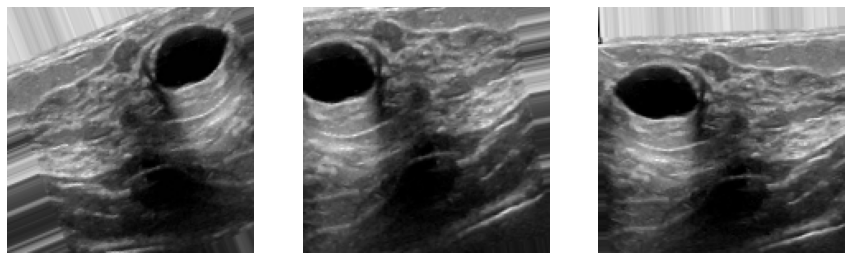

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

img_path = os.path.join(train_b_dir, train_b_fnames[2])
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# The .flow() command below generates batches of randomly transformed images
i = 0
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15))
for a in range(3):
  for batch in datagen.flow(x, batch_size=1):
    image = array_to_img(batch[0])
    ax[a].imshow(image)
    ax[a].axis('off')
    #plt.figure(i)
    #imgplot = plt.imshow(img)
    i += 1
    if i % 5 == 0:
      break

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    brightness_range=[0.2,1.0],
    horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150), 
                                                    batch_size=20, class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(validation_dir, target_size=(150, 150), 
                                                       batch_size=20, class_mode='categorical')

Found 701 images belonging to 3 classes.
Found 78 images belonging to 3 classes.


In [8]:
train_generator.class_indices

{'benign': 0, 'malignant': 1, 'normal': 2}

In [9]:
validation_generator.class_indices

{'benign': 0, 'malignant': 1, 'normal': 2}

In [10]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import label_binarize

In [11]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Activation
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import add
from keras.utils import plot_model
 
# function for creating an identity or projection residual module
def residual_module(layer_in, n_filters):
	merge_input = layer_in
	# check if the number of filters needs to be increase, assumes channels last format
	if layer_in.shape[-1] != n_filters:
		merge_input = Conv2D(n_filters, (1,1), padding='same', activation='relu', kernel_initializer='he_normal')(layer_in)
	# conv1
	conv1 = Conv2D(n_filters, (3,3), padding='same', activation='relu', kernel_initializer='he_normal')(layer_in)
	# conv2
	conv2 = Conv2D(n_filters, (3,3), padding='same', activation='linear', kernel_initializer='he_normal')(conv1)
	# add filters, assumes filters/channels last
	layer_out = add([conv2, merge_input])
	# activation function
	layer_out = Activation('relu')(layer_out)
	return layer_out

In [29]:
img_input = layers.Input(shape=(150, 150, 3))

x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Convolution2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

#x = residual_module(x, 64)

x = layers.Flatten()(x)
x = layers.Dense(1000, activation='relu')(x)
x = layers.Dropout(0.5)(x)

output = layers.Dense(3, activation='softmax')(x)

model = Model(img_input, output)
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.001), metrics=['acc'])

In [30]:
history = model.fit(train_generator, 
                    steps_per_epoch=int(701/20), epochs=50, validation_data=validation_generator, 
                    validation_steps=int(78/20), verbose=1)

Epoch 1/50
35/35 [==============================] - 42s 1s/step - loss: 1.2220 - acc: 0.4747 - val_loss: 0.9535 - val_acc: 0.5833
Epoch 2/50
35/35 [==============================] - 33s 939ms/step - loss: 0.9472 - acc: 0.5921 - val_loss: 1.0219 - val_acc: 0.5333
Epoch 3/50
35/35 [==============================] - 34s 975ms/step - loss: 0.9066 - acc: 0.6033 - val_loss: 0.8910 - val_acc: 0.5833
Epoch 4/50
35/35 [==============================] - 33s 933ms/step - loss: 0.8970 - acc: 0.6306 - val_loss: 1.0294 - val_acc: 0.5667
Epoch 5/50
35/35 [==============================] - 34s 976ms/step - loss: 0.8850 - acc: 0.6481 - val_loss: 1.0386 - val_acc: 0.5833
Epoch 6/50
35/35 [==============================] - 33s 938ms/step - loss: 0.8195 - acc: 0.6388 - val_loss: 0.9831 - val_acc: 0.6333
Epoch 7/50
35/35 [==============================] - 35s 980ms/step - loss: 0.8503 - acc: 0.6776 - val_loss: 0.9551 - val_acc: 0.5833
Epoch 8/50
35/35 [==============================] - 34s 958ms/step - los

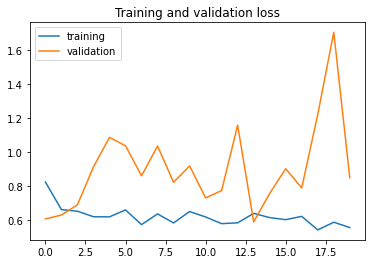

In [36]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label = 'training')
plt.plot(epochs, val_acc, label = 'validation')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label = 'training')
plt.plot(epochs, val_loss, label = 'validation')
plt.title('Training and validation loss')
plt.legend()

In [37]:
y_pred = model.predict(validation_generator)
y_test = validation_generator.classes
y_test = label_binarize(y_test, classes=[0, 1, 2])

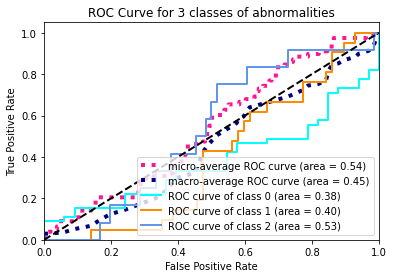

In [38]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

n_classes = 3
# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for 3 classes of abnormalities')
plt.legend(loc="lower right")
plt.show()

Feature Extraction Using ResNet50

In [27]:
path = 'Dataset_clean/train/normal/normal (13).png'
img_test = load_img(path, target_size=(150, 150))
print(img_test)
img_test = img_to_array(img_test)
img_test = img_test.reshape((1,) + img_test.shape)
img_test.shape

<PIL.Image.Image image mode=RGB size=150x150 at 0x7F8E903A6640>


(1, 150, 150, 3)

In [28]:
model.predict(img_test)

array([[1.0000000e+00, 0.0000000e+00, 1.4315009e-36]], dtype=float32)

In [41]:
base_dir = 'Mendeley Database'
test_dir = os.path.join(base_dir, 'test')

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir,target_size=(150, 150), batch_size=20, class_mode='categorical')
model.evaluate(test_generator)

Found 250 images belonging to 3 classes.
13/13 [==============================] - 2s 185ms/step - loss: 2.0039 - acc: 0.4800


[2.0039010047912598, 0.47999998927116394]

In [42]:
img_input = layers.Input(shape=(150, 150, 3))

x1 = layers.Conv2D(16, 3, activation='relu')(img_input)
x1 = layers.MaxPooling2D(2)(x1)

x1 = layers.Conv2D(32, 3, activation='relu')(x1)
x1 = layers.MaxPooling2D(2)(x1)

x1 = layers.Convolution2D(64, 3, activation='relu')(x1)
x1 = layers.MaxPooling2D(2)(x1)

x1 = layers.Flatten()(x1)
x1 = layers.Dense(1000, activation='relu')(x1)
x1 = layers.Dropout(0.5)(x1)

output1 = layers.Dense(3)(x1)

model1 = Model(img_input, output1)
model1.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.001), metrics=['acc'])

In [43]:
w_old = model.get_weights()
w_new = model1.get_weights()

model1.set_weights(w_old)

In [44]:
import pickle
filename = 'model_weights_430.pickle'
outfile = open(filename,'wb')

pickle.dump(w_old,outfile)
outfile.close()

In [45]:
infile = open(filename,'rb')
w_old_unpickled = pickle.load(infile)
infile.close()

len(w_old_unpickled) #weights

10

In [46]:
w_old_unpickled[1]

array([ 0.00562572, -0.0076438 ,  0.00266488, -0.00629003,  0.00525426,
       -0.02830134,  0.00260754, -0.01512384,  0.0048534 , -0.00021353,
        0.00616453,  0.00545438,  0.00933203,  0.02539718, -0.00412579,
       -0.00430935], dtype=float32)

In [47]:
w_old[1]

array([ 0.00562572, -0.0076438 ,  0.00266488, -0.00629003,  0.00525426,
       -0.02830134,  0.00260754, -0.01512384,  0.0048534 , -0.00021353,
        0.00616453,  0.00545438,  0.00933203,  0.02539718, -0.00412579,
       -0.00430935], dtype=float32)

In [48]:
# this should show the confidence of the model on each diagnosis (my terminology might be off)



pred1 = model1.predict(img_test)[0]
tot = sum(pred1)
print([i/tot for i in pred1])

# print(pred1)

print(model.predict(img_test)[0])

[-0.36892426424066, 0.22936586129704897, 1.139558402943611]
[1. 0. 0.]


In [49]:
model1.layers[10].activation
model.layers[10].activation

pred1

array([  629.9816 ,  -391.66922, -1945.9302 ], dtype=float32)

In [ ]:
from ipywidgets import Button, HTML, HBox, VBox, Checkbox, FileUpload, Label, Output, IntSlider, Layout, Image, link
import ipywidgets as widgets